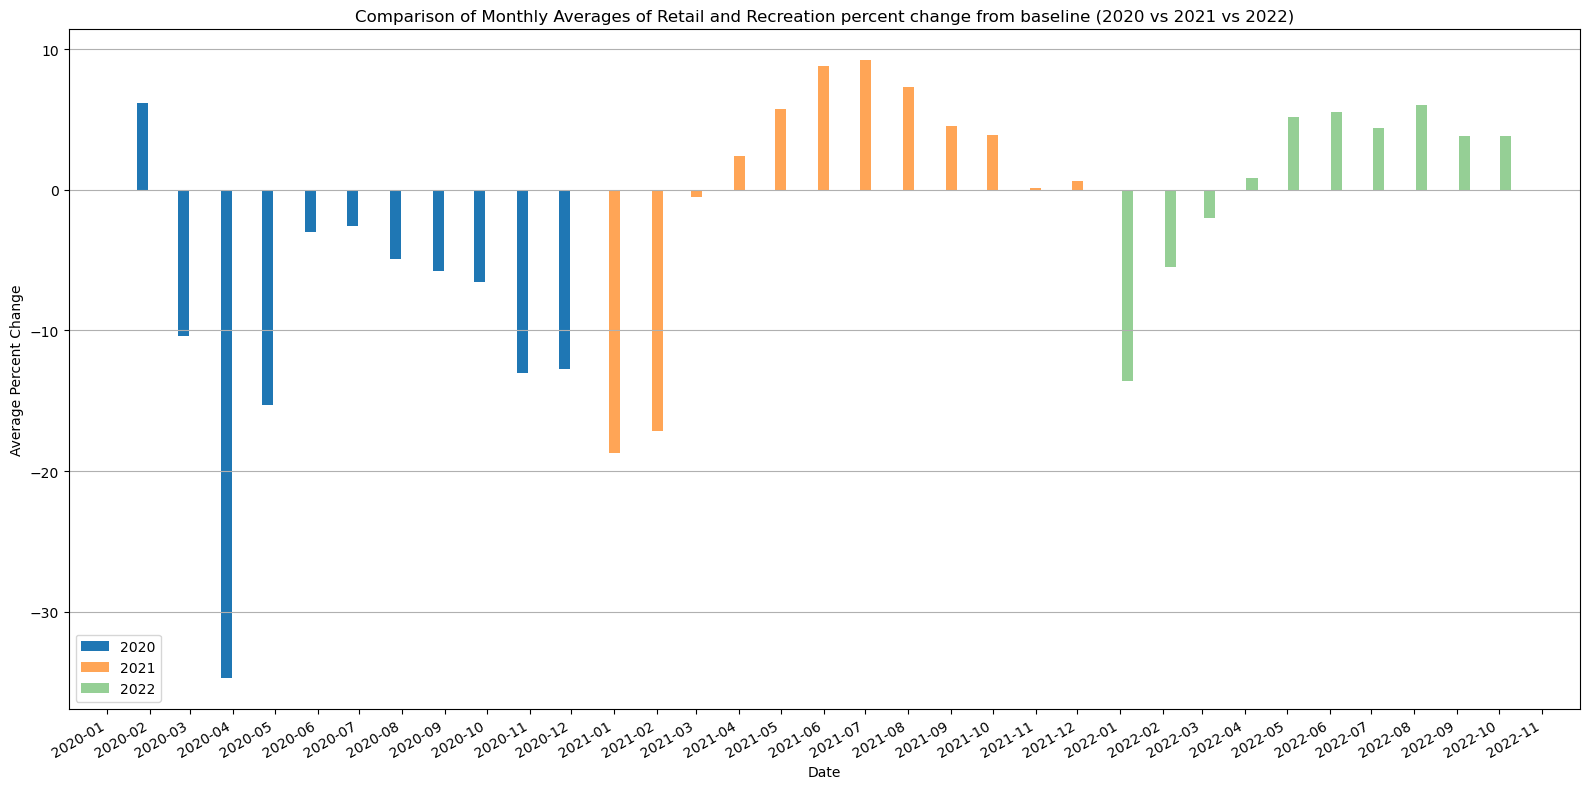

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"  # Add path for 2022 dataset
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)  # Read 2022 dataset

# Specify the columns you want to plot
x_column = 'date'
y_column = 'retail_and_recreation_percent_change_from_baseline'

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])  # Convert 2022 dates

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()  # 2022 data

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()  # 2022 data

# Rename columns to distinguish between datasets
monthly_avg1 = monthly_avg1.rename(columns={y_column: 'value_2020'})
monthly_avg2 = monthly_avg2.rename(columns={y_column: 'value_2021'})
monthly_avg3 = monthly_avg3.rename(columns={y_column: 'value_2022'})  # 2022 data

# Merge the three datasets
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, how='outer')  # Merge 2022 data
merged_df = merged_df.sort_values(x_column)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Set the width of each bar
width = 8  # Adjusted to accommodate three bars

# Create the bars
ax.bar(merged_df[x_column] - pd.Timedelta(days=5), merged_df['value_2020'], width, label='2020', align='center')
ax.bar(merged_df[x_column], merged_df['value_2021'], width, label='2021', align='center', alpha=0.7)
ax.bar(merged_df[x_column] + pd.Timedelta(days=5), merged_df['value_2022'], width, label='2022', align='center', alpha=0.5)  # 2022 data

# Customize the plot
ax.set_title('Comparison of Monthly Averages of Retail and Recreation percent change from baseline (2020 vs 2021 vs 2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Percent Change')
ax.legend()

# Set x-axis ticks and labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Display the plot
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("retail.png")
plt.show()

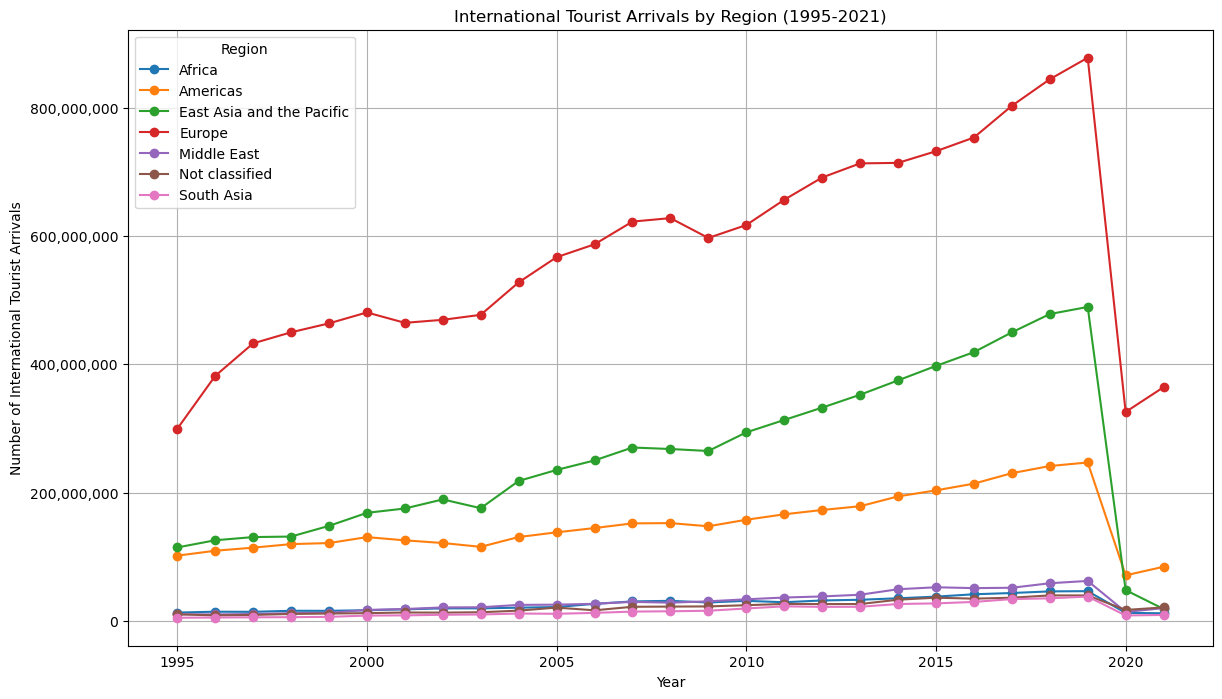

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "C:/Users/Santhosh/Downloads/International tourist arrivals new.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Pivot the data to have years as columns and regions as rows
pivot_data = data.pivot(index='Year', columns='Region', values='International tourist arrivals by region')

# Plotting the data
plt.figure(figsize=(14, 8))

for region in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[region], marker='o', label=region)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of International Tourist Arrivals')
plt.title('International Tourist Arrivals by Region (1995-2021)')
plt.legend(title='Region')
plt.grid(True)

# Adjust y-axis to show actual counts
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.savefig("Tourist_arrivals.png")

# Display the plot
plt.show()


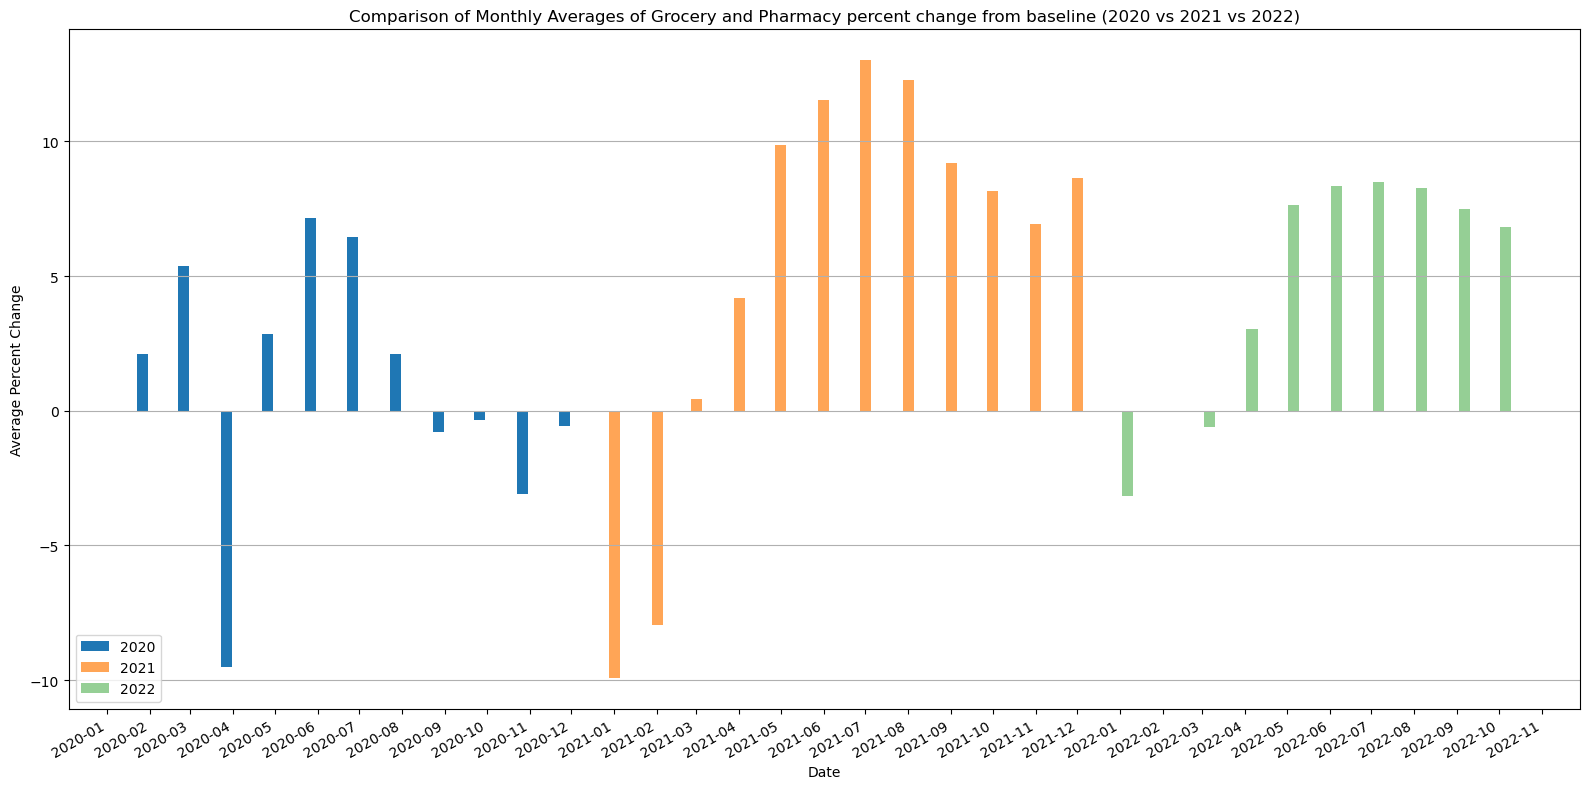

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"  # Add path for 2022 dataset
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)  # Read 2022 dataset

# Specify the columns you want to plot
x_column = 'date'
y_column = 'grocery_and_pharmacy_percent_change_from_baseline'

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])  # Convert 2022 dates

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()  # 2022 data

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()  # 2022 data

# Rename columns to distinguish between datasets
monthly_avg1 = monthly_avg1.rename(columns={y_column: 'value_2020'})
monthly_avg2 = monthly_avg2.rename(columns={y_column: 'value_2021'})
monthly_avg3 = monthly_avg3.rename(columns={y_column: 'value_2022'})  # 2022 data

# Merge the three datasets
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, how='outer')  # Merge 2022 data
merged_df = merged_df.sort_values(x_column)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Set the width of each bar
width = 8  # Adjusted to accommodate three bars

# Create the bars
ax.bar(merged_df[x_column] - pd.Timedelta(days=5), merged_df['value_2020'], width, label='2020', align='center')
ax.bar(merged_df[x_column], merged_df['value_2021'], width, label='2021', align='center', alpha=0.7)
ax.bar(merged_df[x_column] + pd.Timedelta(days=5), merged_df['value_2022'], width, label='2022', align='center', alpha=0.5)  # 2022 data

# Customize the plot
ax.set_title('Comparison of Monthly Averages of Grocery and Pharmacy percent change from baseline (2020 vs 2021 vs 2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Percent Change')
ax.legend()

# Set x-axis ticks and labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Display the plot
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("grocery.png")
plt.show()

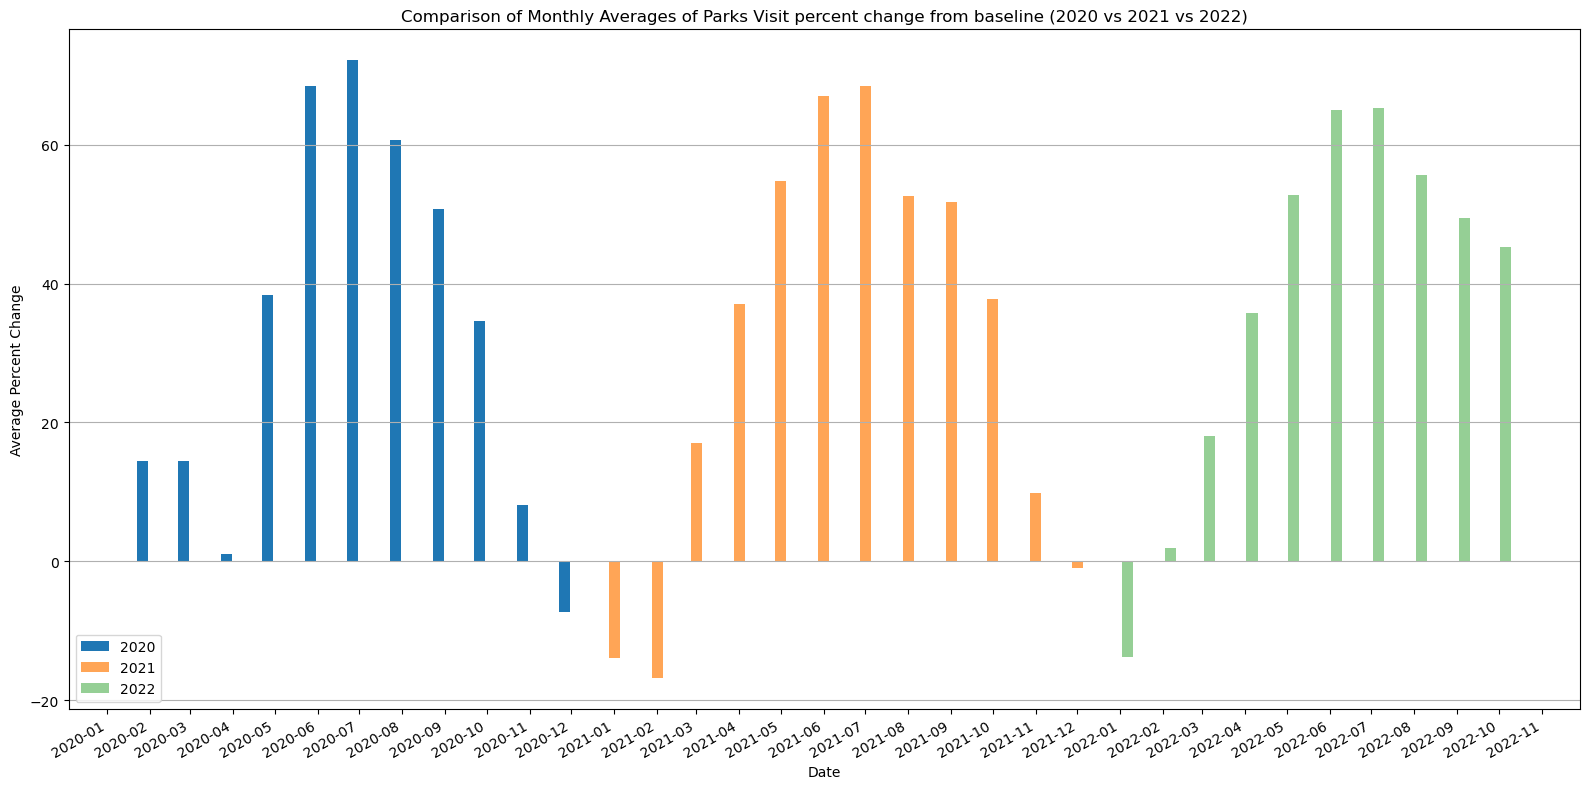

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"  # Add path for 2022 dataset
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)  # Read 2022 dataset

# Specify the columns you want to plot
x_column = 'date'
y_column = 'parks_percent_change_from_baseline'

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])  # Convert 2022 dates

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()  # 2022 data

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()  # 2022 data

# Rename columns to distinguish between datasets
monthly_avg1 = monthly_avg1.rename(columns={y_column: 'value_2020'})
monthly_avg2 = monthly_avg2.rename(columns={y_column: 'value_2021'})
monthly_avg3 = monthly_avg3.rename(columns={y_column: 'value_2022'})  # 2022 data

# Merge the three datasets
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, how='outer')  # Merge 2022 data
merged_df = merged_df.sort_values(x_column)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Set the width of each bar
width = 8  # Adjusted to accommodate three bars

# Create the bars
ax.bar(merged_df[x_column] - pd.Timedelta(days=5), merged_df['value_2020'], width, label='2020', align='center')
ax.bar(merged_df[x_column], merged_df['value_2021'], width, label='2021', align='center', alpha=0.7)
ax.bar(merged_df[x_column] + pd.Timedelta(days=5), merged_df['value_2022'], width, label='2022', align='center', alpha=0.5)  # 2022 data

# Customize the plot
ax.set_title('Comparison of Monthly Averages of Parks Visit percent change from baseline (2020 vs 2021 vs 2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Percent Change')
ax.legend()

# Set x-axis ticks and labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Display the plot
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("park.png")
plt.show()

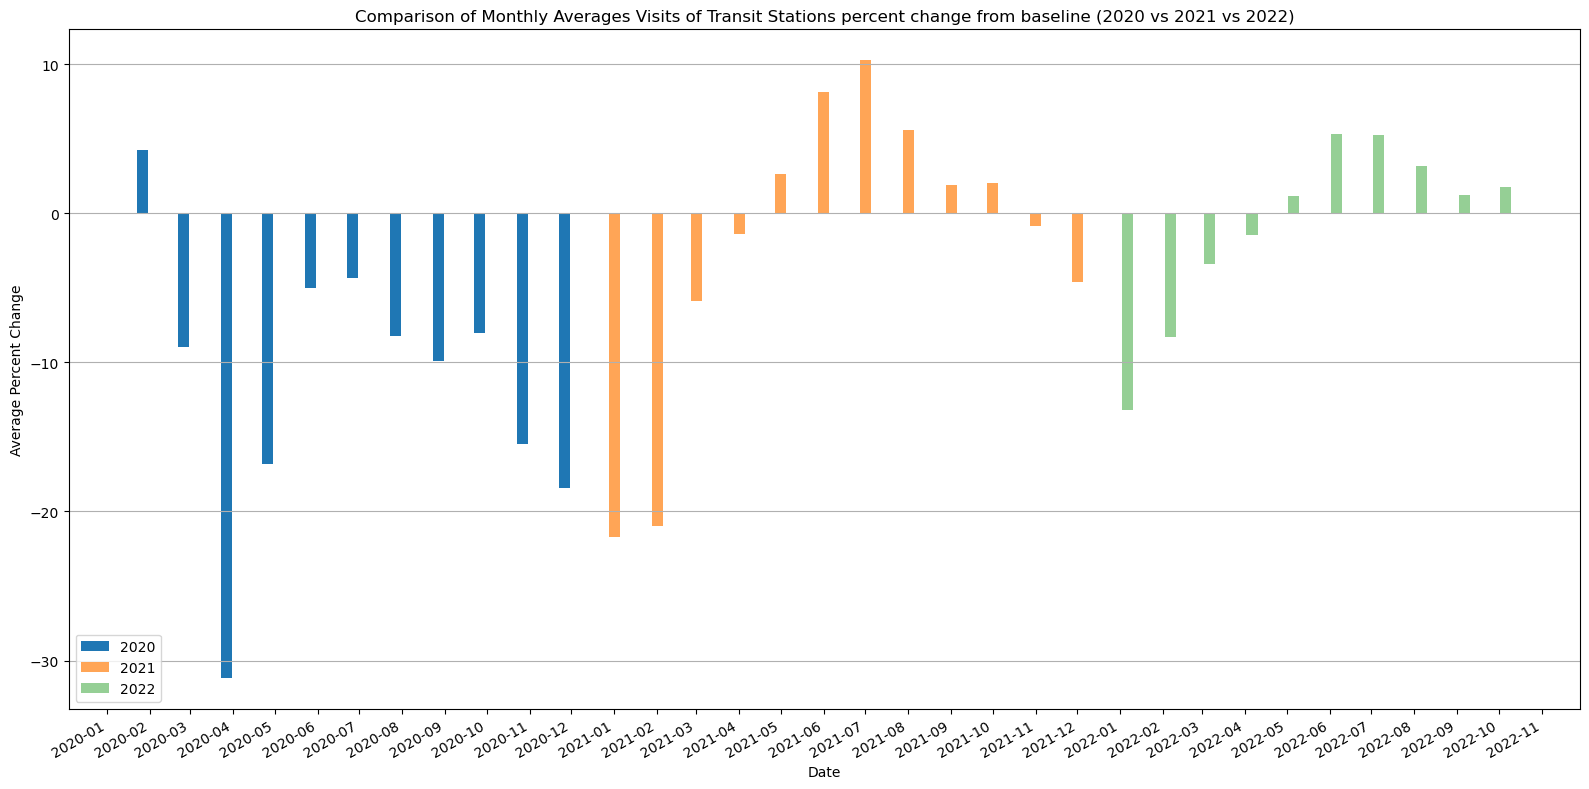

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"  # Add path for 2022 dataset
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)  # Read 2022 dataset

# Specify the columns you want to plot
x_column = 'date'
y_column = 'transit_stations_percent_change_from_baseline'

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])  # Convert 2022 dates

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()  # 2022 data

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()  # 2022 data

# Rename columns to distinguish between datasets
monthly_avg1 = monthly_avg1.rename(columns={y_column: 'value_2020'})
monthly_avg2 = monthly_avg2.rename(columns={y_column: 'value_2021'})
monthly_avg3 = monthly_avg3.rename(columns={y_column: 'value_2022'})  # 2022 data

# Merge the three datasets
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, how='outer')  # Merge 2022 data
merged_df = merged_df.sort_values(x_column)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Set the width of each bar
width = 8  # Adjusted to accommodate three bars

# Create the bars
ax.bar(merged_df[x_column] - pd.Timedelta(days=5), merged_df['value_2020'], width, label='2020', align='center')
ax.bar(merged_df[x_column], merged_df['value_2021'], width, label='2021', align='center', alpha=0.7)
ax.bar(merged_df[x_column] + pd.Timedelta(days=5), merged_df['value_2022'], width, label='2022', align='center', alpha=0.5)  # 2022 data

# Customize the plot
ax.set_title('Comparison of Monthly Averages Visits of Transit Stations percent change from baseline (2020 vs 2021 vs 2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Percent Change')
ax.legend()

# Set x-axis ticks and labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Display the plot
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("transit.png")
plt.show()

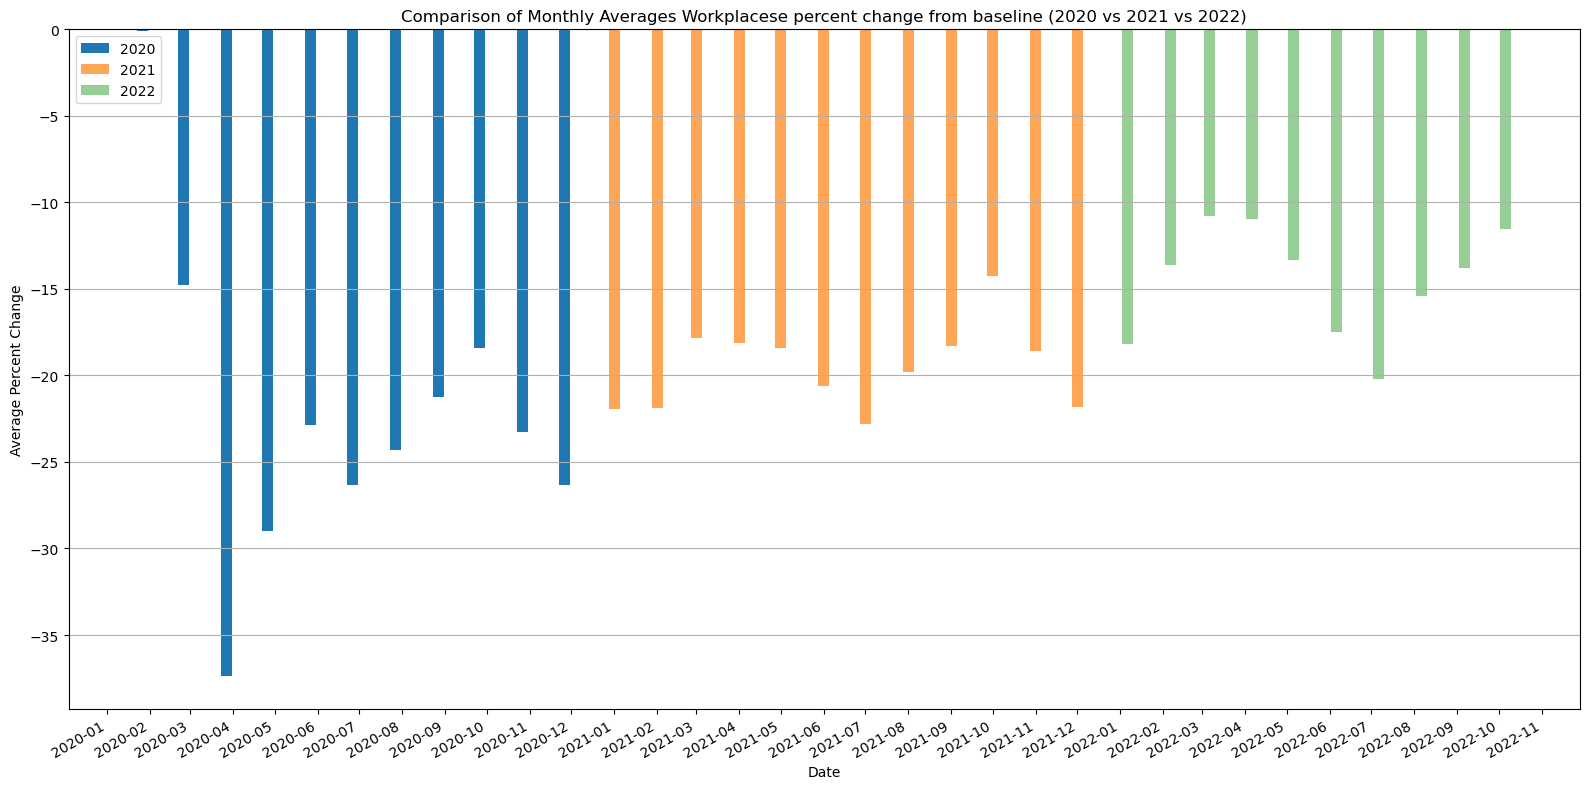

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"  # Add path for 2022 dataset
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)  # Read 2022 dataset

# Specify the columns you want to plot
x_column = 'date'
y_column = 'workplaces_percent_change_from_baseline'

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])  # Convert 2022 dates

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()  # 2022 data

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()  # 2022 data

# Rename columns to distinguish between datasets
monthly_avg1 = monthly_avg1.rename(columns={y_column: 'value_2020'})
monthly_avg2 = monthly_avg2.rename(columns={y_column: 'value_2021'})
monthly_avg3 = monthly_avg3.rename(columns={y_column: 'value_2022'})  # 2022 data

# Merge the three datasets
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, how='outer')  # Merge 2022 data
merged_df = merged_df.sort_values(x_column)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Set the width of each bar
width = 8  # Adjusted to accommodate three bars

# Create the bars
ax.bar(merged_df[x_column] - pd.Timedelta(days=5), merged_df['value_2020'], width, label='2020', align='center')
ax.bar(merged_df[x_column], merged_df['value_2021'], width, label='2021', align='center', alpha=0.7)
ax.bar(merged_df[x_column] + pd.Timedelta(days=5), merged_df['value_2022'], width, label='2022', align='center', alpha=0.5)  # 2022 data

# Customize the plot
ax.set_title('Comparison of Monthly Averages Workplacese percent change from baseline (2020 vs 2021 vs 2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Percent Change')
ax.legend()

# Set x-axis ticks and labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Display the plot
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("workplace.png")
plt.show()

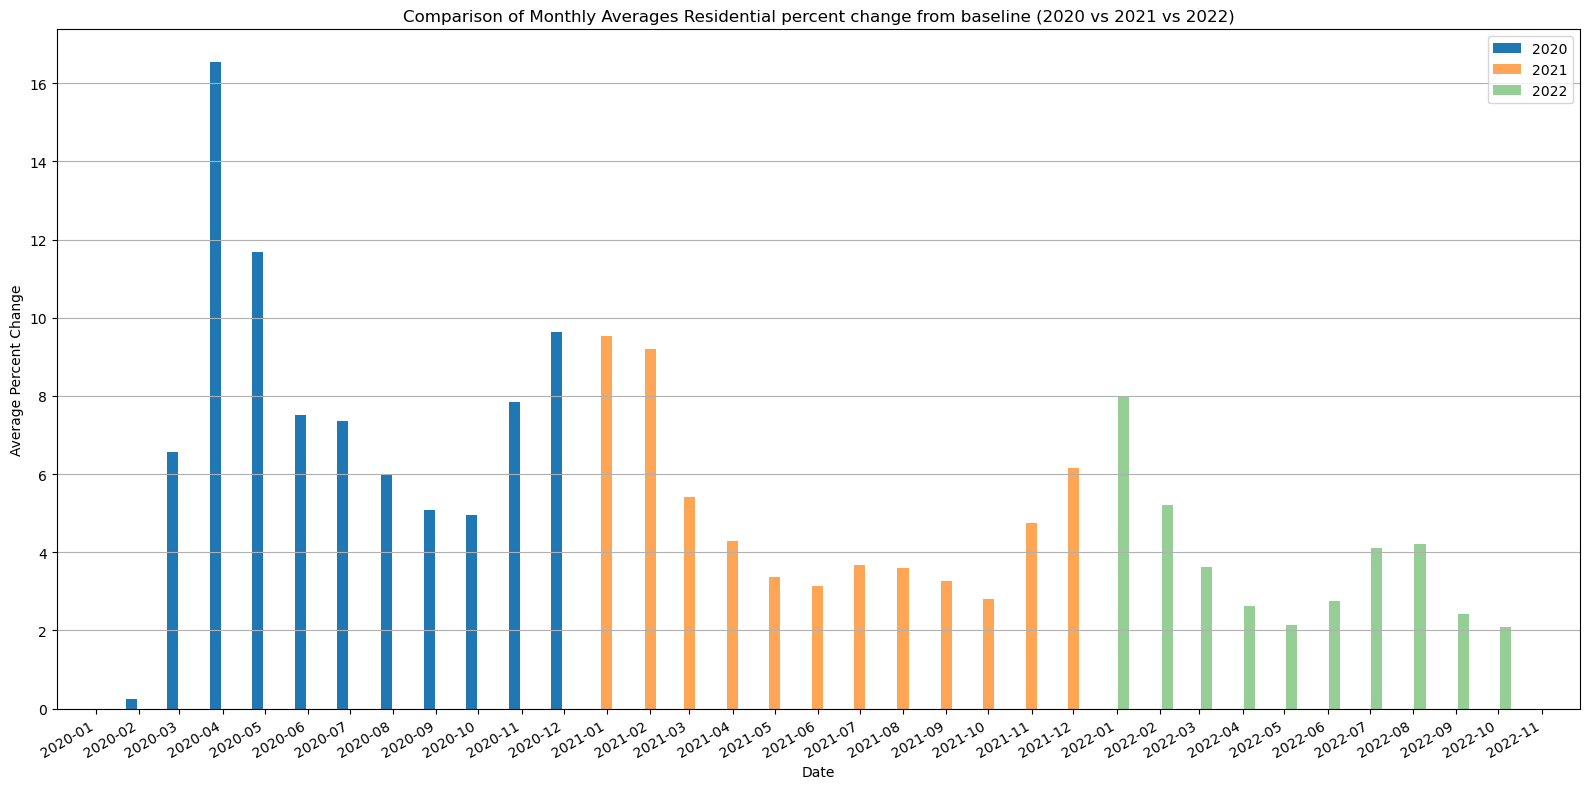

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"  # Add path for 2022 dataset
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)  # Read 2022 dataset

# Specify the columns you want to plot
x_column = 'date'
y_column = 'residential_percent_change_from_baseline'

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])  # Convert 2022 dates

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({y_column: 'mean'}).reset_index()  # 2022 data

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()  # 2022 data

# Rename columns to distinguish between datasets
monthly_avg1 = monthly_avg1.rename(columns={y_column: 'value_2020'})
monthly_avg2 = monthly_avg2.rename(columns={y_column: 'value_2021'})
monthly_avg3 = monthly_avg3.rename(columns={y_column: 'value_2022'})  # 2022 data

# Merge the three datasets
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, how='outer')  # Merge 2022 data
merged_df = merged_df.sort_values(x_column)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Set the width of each bar
width = 8  # Adjusted to accommodate three bars

# Create the bars
ax.bar(merged_df[x_column] - pd.Timedelta(days=5), merged_df['value_2020'], width, label='2020', align='center')
ax.bar(merged_df[x_column], merged_df['value_2021'], width, label='2021', align='center', alpha=0.7)
ax.bar(merged_df[x_column] + pd.Timedelta(days=5), merged_df['value_2022'], width, label='2022', align='center', alpha=0.5)  # 2022 data

# Customize the plot
ax.set_title('Comparison of Monthly Averages Residential percent change from baseline (2020 vs 2021 vs 2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Percent Change')
ax.legend()

# Set x-axis ticks and labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Display the plot
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("residential.png")
plt.show()

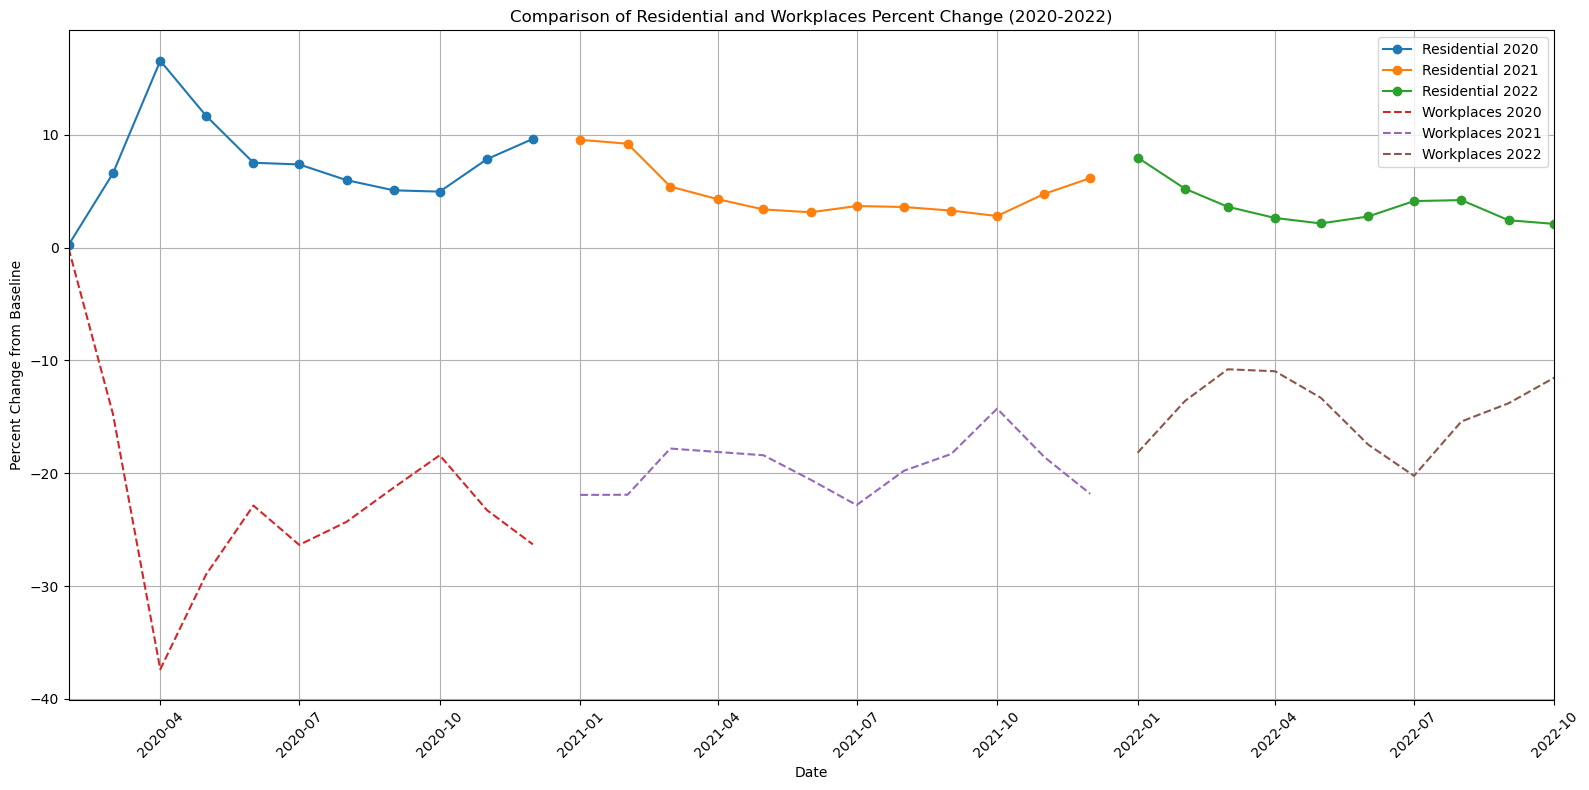

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"

df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

# Specify the columns you want to plot
x_column = 'date'
y_columns = [
    'residential_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline'
]

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()

# Merge the three datasets on date
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, suffixes=('_2020', '_2021'), how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, suffixes=('', '_2022'), how='outer')
merged_df = merged_df.sort_values(x_column)

# Plotting the data
plt.figure(figsize=(16, 8))

# Plot residential percent change
plt.plot(merged_df[x_column], merged_df.get('residential_percent_change_from_baseline_2020', default=None), label='Residential 2020', marker='o')
plt.plot(merged_df[x_column], merged_df.get('residential_percent_change_from_baseline_2021', default=None), label='Residential 2021', marker='o')
plt.plot(merged_df[x_column], merged_df.get('residential_percent_change_from_baseline', default=None), label='Residential 2022', marker='o')  # No suffix for 2022

# Plot workplaces percent change
plt.plot(merged_df[x_column], merged_df.get('workplaces_percent_change_from_baseline_2020', default=None), label='Workplaces 2020', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('workplaces_percent_change_from_baseline_2021', default=None), label='Workplaces 2021', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('workplaces_percent_change_from_baseline', default=None), label='Workplaces 2022', linestyle='--')  # No suffix for 2022

# Customize the plot
plt.title('Comparison of Residential and Workplaces Percent Change (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Set x-axis limits to ensure it covers full range
plt.xlim([merged_df[x_column].min(), merged_df[x_column].max()])

# Display the plot
plt.tight_layout()
plt.savefig("Residential vs workplace.png")
plt.show()

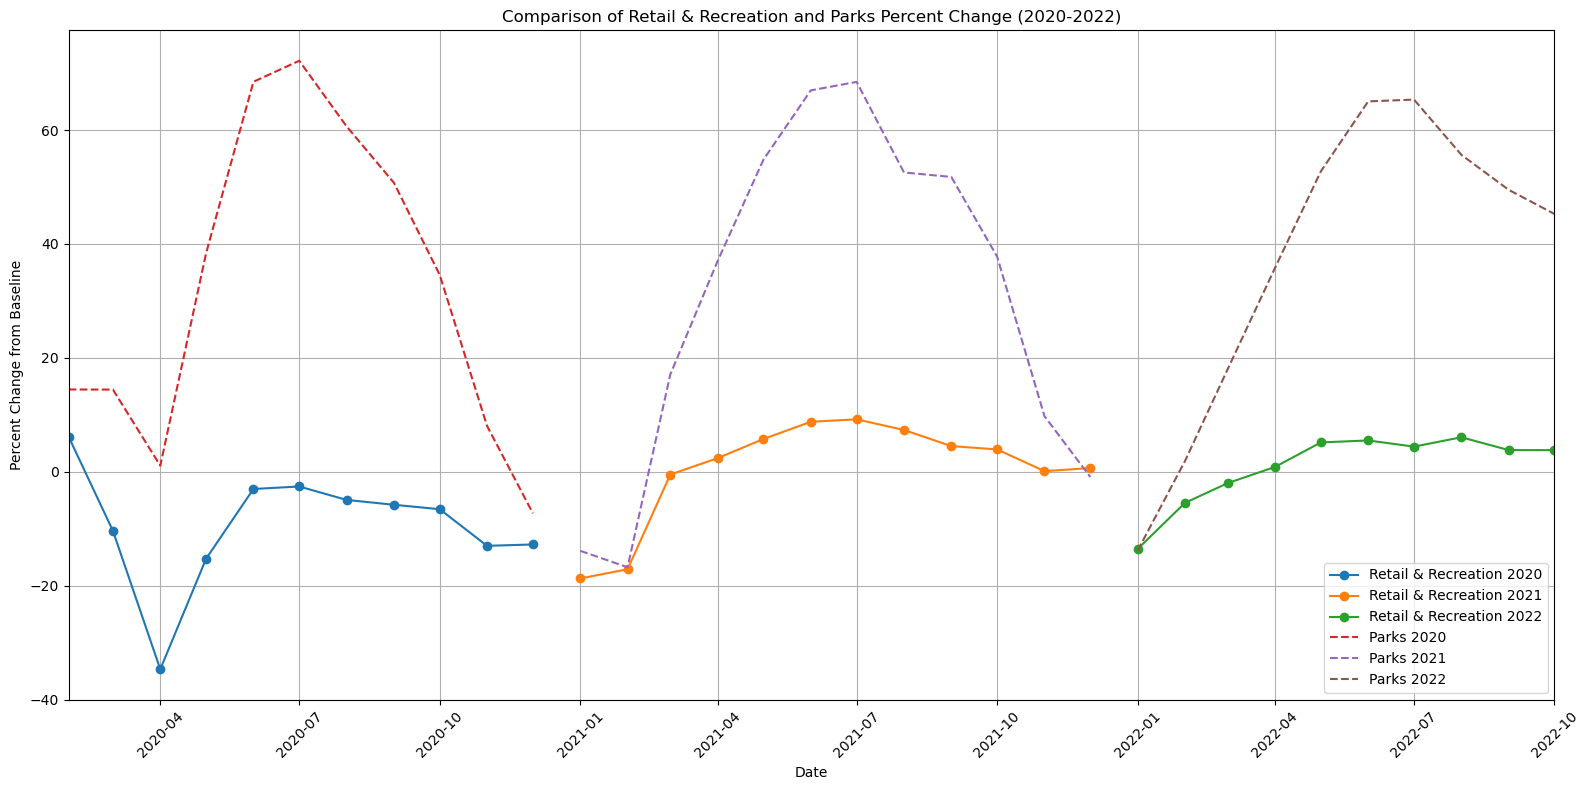

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"

df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

# Specify the columns you want to plot
x_column = 'date'
y_columns = [
    'retail_and_recreation_percent_change_from_baseline',  # Retail and recreation percent change
    'parks_percent_change_from_baseline'  # Parks percent change
]

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()

# Merge the three datasets on date
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, suffixes=('_2020', '_2021'), how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, suffixes=('', '_2022'), how='outer')
merged_df = merged_df.sort_values(x_column)

# Plotting the data
plt.figure(figsize=(16, 8))

# Plot retail and recreation percent change
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline_2020', default=None), label='Retail & Recreation 2020', marker='o')
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline_2021', default=None), label='Retail & Recreation 2021', marker='o')
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline', default=None), label='Retail & Recreation 2022', marker='o')  # No suffix for 2022

# Plot parks percent change
plt.plot(merged_df[x_column], merged_df.get('parks_percent_change_from_baseline_2020', default=None), label='Parks 2020', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('parks_percent_change_from_baseline_2021', default=None), label='Parks 2021', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('parks_percent_change_from_baseline', default=None), label='Parks 2022', linestyle='--')  # No suffix for 2022

# Customize the plot
plt.title('Comparison of Retail & Recreation and Parks Percent Change (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Set x-axis limits to ensure it covers full range
plt.xlim([merged_df[x_column].min(), merged_df[x_column].max()])

# Display the plot
plt.tight_layout()
plt.savefig("Retail vs park.png")
plt.show()

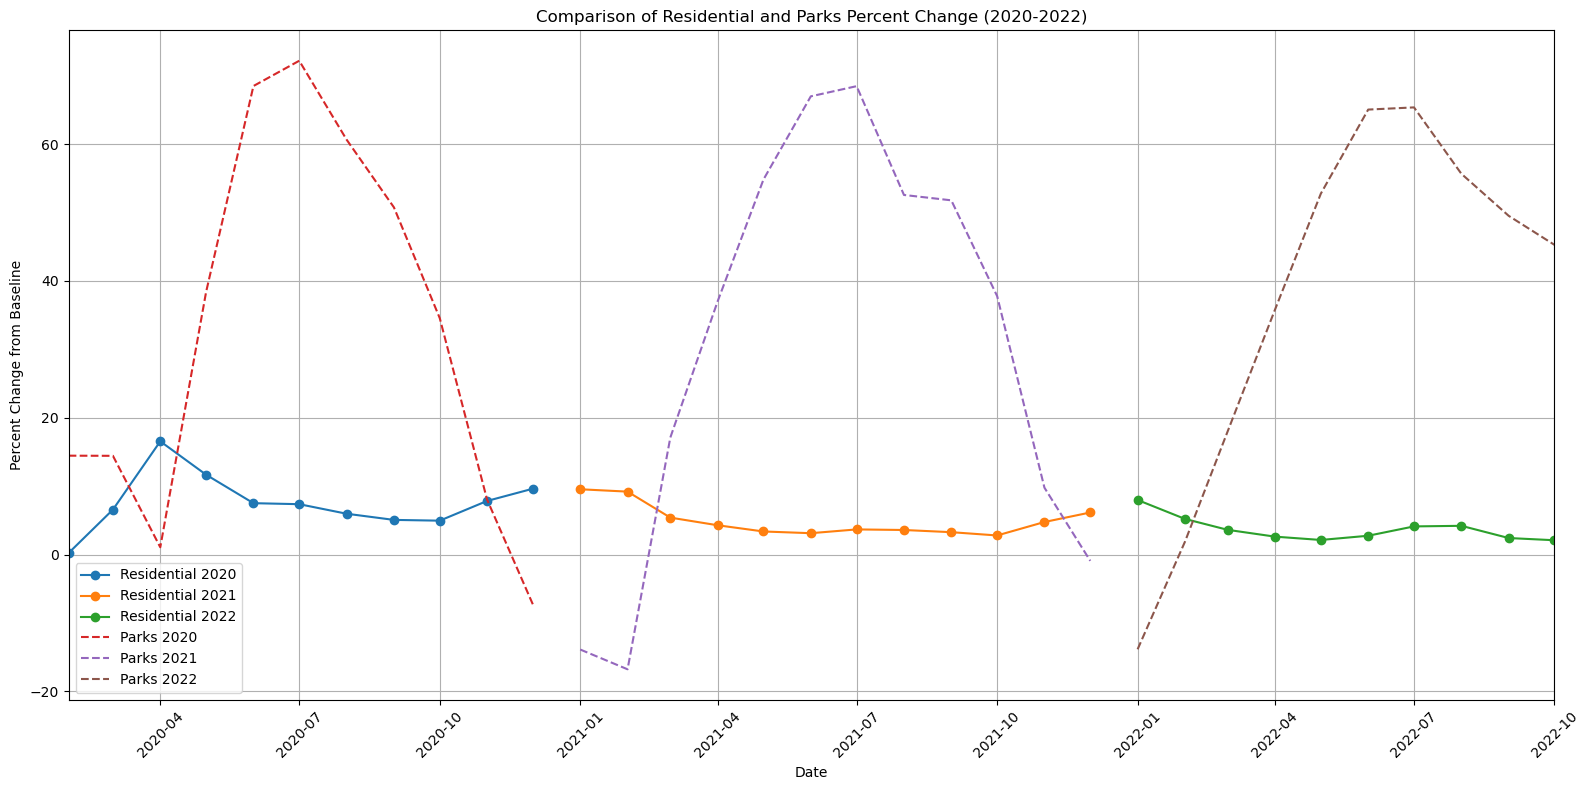

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"

df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

# Specify the columns you want to plot
x_column = 'date'
y_columns = [
    'residential_percent_change_from_baseline',  # Residential percent change
    'parks_percent_change_from_baseline'  # Parks percent change
]

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()

# Merge the three datasets on date
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, suffixes=('_2020', '_2021'), how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, suffixes=('', '_2022'), how='outer')
merged_df = merged_df.sort_values(x_column)

# Plotting the data
plt.figure(figsize=(16, 8))

# Plot residential percent change
plt.plot(merged_df[x_column], merged_df.get('residential_percent_change_from_baseline_2020', default=None), label='Residential 2020', marker='o')
plt.plot(merged_df[x_column], merged_df.get('residential_percent_change_from_baseline_2021', default=None), label='Residential 2021', marker='o')
plt.plot(merged_df[x_column], merged_df.get('residential_percent_change_from_baseline', default=None), label='Residential 2022', marker='o')  # No suffix for 2022

# Plot parks percent change
plt.plot(merged_df[x_column], merged_df.get('parks_percent_change_from_baseline_2020', default=None), label='Parks 2020', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('parks_percent_change_from_baseline_2021', default=None), label='Parks 2021', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('parks_percent_change_from_baseline', default=None), label='Parks 2022', linestyle='--')  # No suffix for 2022

# Customize the plot
plt.title('Comparison of Residential and Parks Percent Change (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Set x-axis limits to ensure it covers full range
plt.xlim([merged_df[x_column].min(), merged_df[x_column].max()])

# Display the plot
plt.tight_layout()
plt.savefig("residential vs park.png")
plt.show()

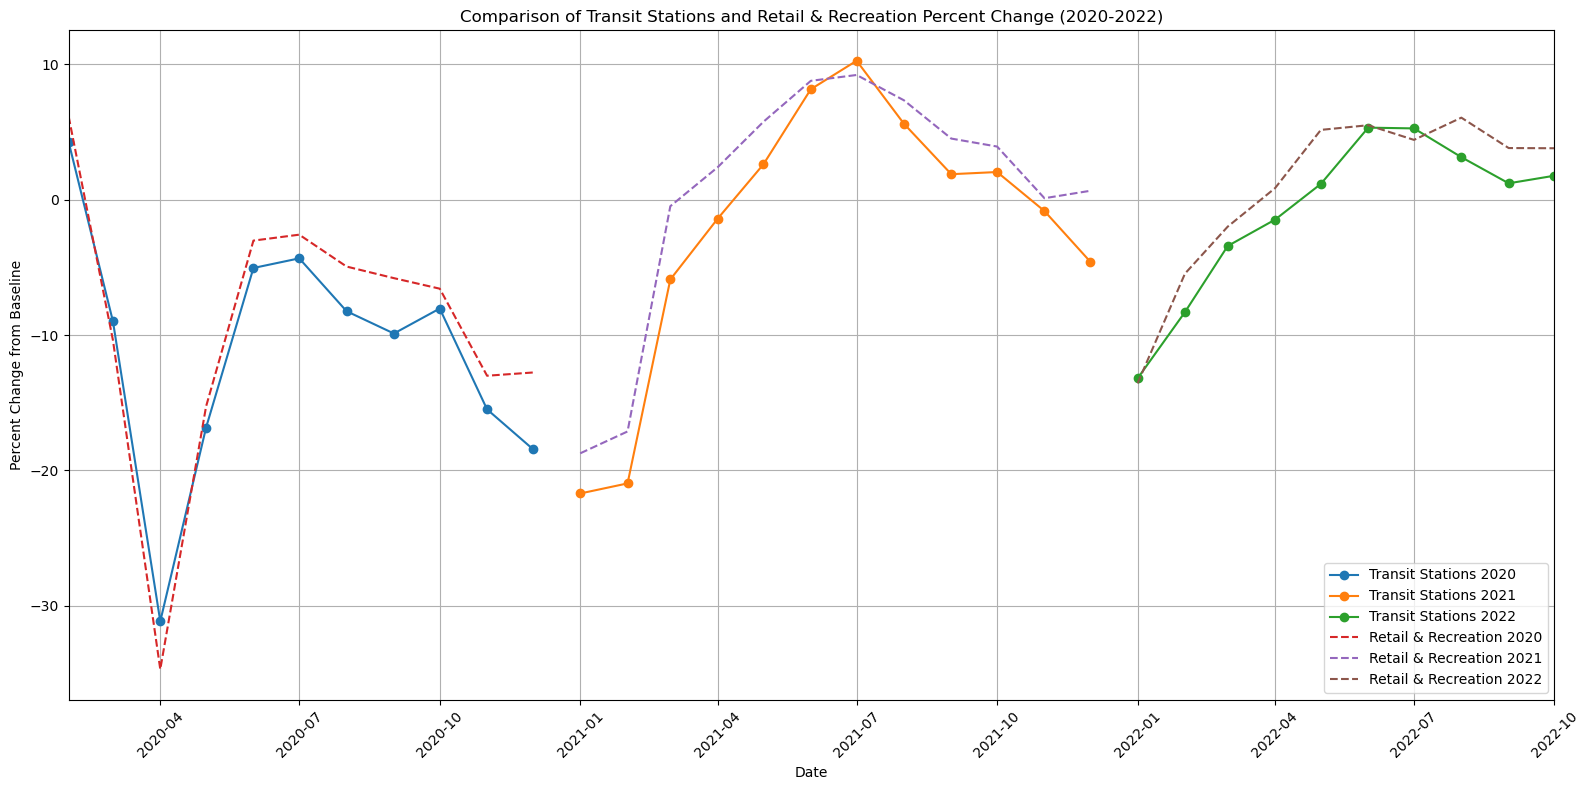

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"

df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

# Specify the columns you want to plot
x_column = 'date'
y_columns = [
    'transit_stations_percent_change_from_baseline',  # Transit stations percent change
    'retail_and_recreation_percent_change_from_baseline'  # Retail and recreation percent change
]

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()

# Merge the three datasets on date
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, suffixes=('_2020', '_2021'), how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, suffixes=('', '_2022'), how='outer')
merged_df = merged_df.sort_values(x_column)

# Plotting the data
plt.figure(figsize=(16, 8))

# Plot transit stations percent change
plt.plot(merged_df[x_column], merged_df.get('transit_stations_percent_change_from_baseline_2020', default=None), label='Transit Stations 2020', marker='o')
plt.plot(merged_df[x_column], merged_df.get('transit_stations_percent_change_from_baseline_2021', default=None), label='Transit Stations 2021', marker='o')
plt.plot(merged_df[x_column], merged_df.get('transit_stations_percent_change_from_baseline', default=None), label='Transit Stations 2022', marker='o')  # No suffix for 2022

# Plot retail and recreation percent change
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline_2020', default=None), label='Retail & Recreation 2020', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline_2021', default=None), label='Retail & Recreation 2021', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline', default=None), label='Retail & Recreation 2022', linestyle='--')  # No suffix for 2022

# Customize the plot
plt.title('Comparison of Transit Stations and Retail & Recreation Percent Change (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Set x-axis limits to ensure it covers full range
plt.xlim([merged_df[x_column].min(), merged_df[x_column].max()])

# Display the plot
plt.tight_layout()
plt.savefig("Transit vs Retail.png")
plt.show()

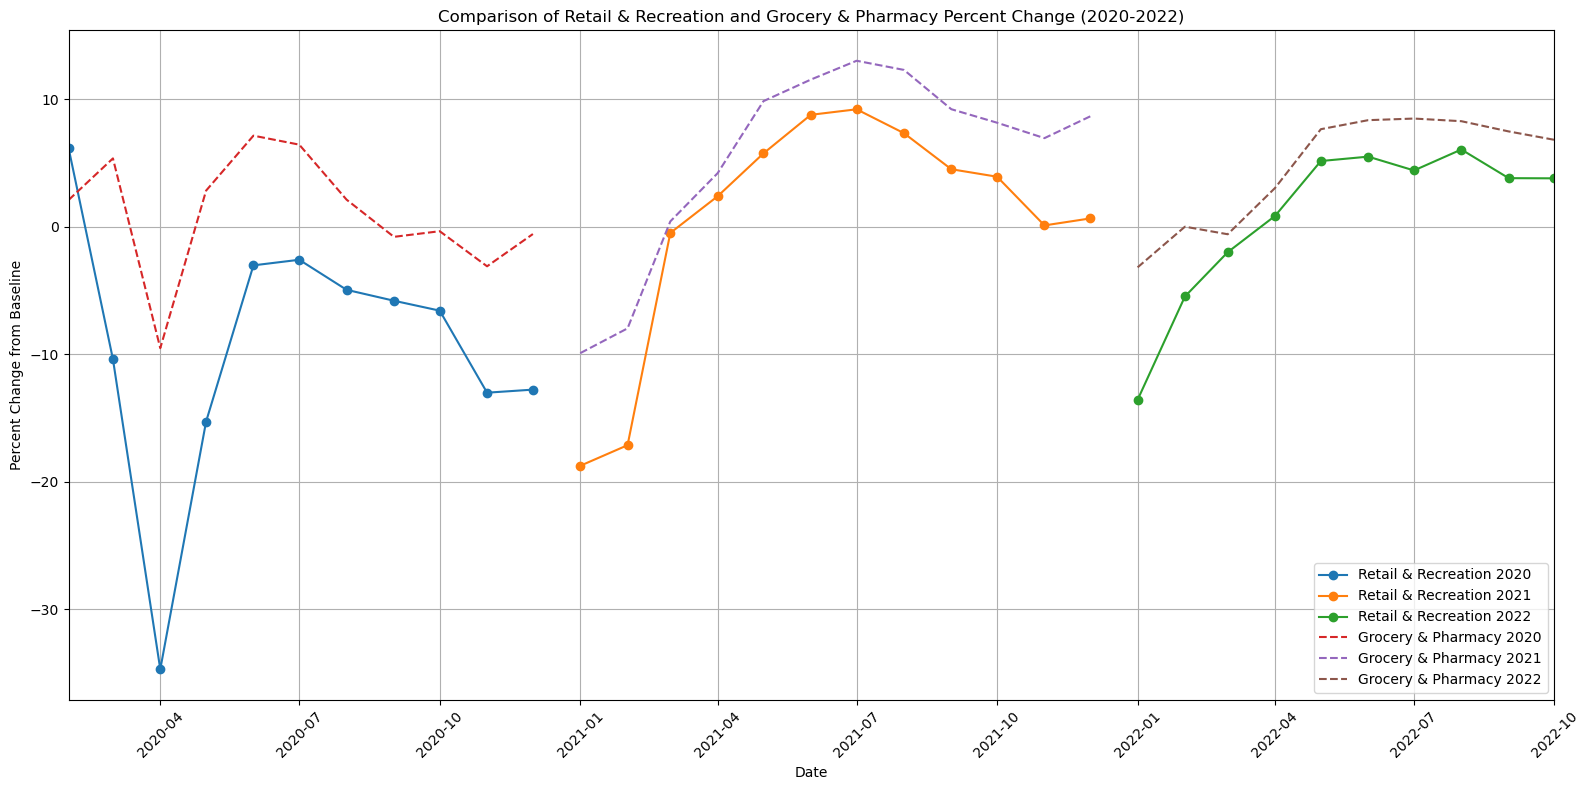

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
csv_path1 = "E:/santhosh/subjects/data visualisation/week 5/2020_US_Region_Mobility_Report.csv"
csv_path2 = "E:/santhosh/subjects/data visualisation/week 5/2021_US_Region_Mobility_Report.csv"
csv_path3 = "E:/santhosh/subjects/data visualisation/week 5/2022_US_Region_Mobility_Report.csv"

df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

# Specify the columns you want to plot
x_column = 'date'
y_columns = [
    'retail_and_recreation_percent_change_from_baseline',  # Retail and recreation percent change
    'grocery_and_pharmacy_percent_change_from_baseline'     # Grocery and pharmacy percent change
]

# Convert the date columns to datetime
df1[x_column] = pd.to_datetime(df1[x_column])
df2[x_column] = pd.to_datetime(df2[x_column])
df3[x_column] = pd.to_datetime(df3[x_column])

# Group by month and calculate average for all datasets
monthly_avg1 = df1.groupby(df1[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg2 = df2.groupby(df2[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()
monthly_avg3 = df3.groupby(df3[x_column].dt.to_period("M")).agg({col: 'mean' for col in y_columns}).reset_index()

monthly_avg1[x_column] = monthly_avg1[x_column].dt.to_timestamp()
monthly_avg2[x_column] = monthly_avg2[x_column].dt.to_timestamp()
monthly_avg3[x_column] = monthly_avg3[x_column].dt.to_timestamp()

# Merge the three datasets on date
merged_df = pd.merge(monthly_avg1, monthly_avg2, on=x_column, suffixes=('_2020', '_2021'), how='outer')
merged_df = pd.merge(merged_df, monthly_avg3, on=x_column, suffixes=('', '_2022'), how='outer')
merged_df = merged_df.sort_values(x_column)

# Plotting the data
plt.figure(figsize=(16, 8))

# Plot retail and recreation percent change
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline_2020', default=None), label='Retail & Recreation 2020', marker='o')
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline_2021', default=None), label='Retail & Recreation 2021', marker='o')
plt.plot(merged_df[x_column], merged_df.get('retail_and_recreation_percent_change_from_baseline', default=None), label='Retail & Recreation 2022', marker='o')  # No suffix for 2022

# Plot grocery and pharmacy percent change
plt.plot(merged_df[x_column], merged_df.get('grocery_and_pharmacy_percent_change_from_baseline_2020', default=None), label='Grocery & Pharmacy 2020', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('grocery_and_pharmacy_percent_change_from_baseline_2021', default=None), label='Grocery & Pharmacy 2021', linestyle='--')
plt.plot(merged_df[x_column], merged_df.get('grocery_and_pharmacy_percent_change_from_baseline', default=None), label='Grocery & Pharmacy 2022', linestyle='--')  # No suffix for 2022

# Customize the plot
plt.title('Comparison of Retail & Recreation and Grocery & Pharmacy Percent Change (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Set x-axis limits to ensure it covers full range
plt.xlim([merged_df[x_column].min(), merged_df[x_column].max()])

# Display the plot
plt.tight_layout()
plt.savefig("reatil vs Grocery.png")
plt.show()